In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [2]:
labels_list_file = r"/home/anhaoran/data/pedestrian_attributes_PETA/PETA/labels.txt" 
labels_list_data = open(labels_list_file)
lines = labels_list_data.readlines()
attributes_list = []
for line in lines:
    data = line.split()
    #print(attr)
    attributes_list.append(data[1])
print("The total attributes labeled: ", len(attributes_list))
print(attributes_list)

The total attributes labeled:  65
['accessoryHeadphone', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'lowerBodyFormal', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'lowerBodyPlaid', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStockin

In [3]:
import numpy as np

images = []
attributes = []
muticlass_attr = ['footwear', 'hair', 'lowerBody', 'upperBody']

dataset_dir = "/home/anhaoran/data/pedestrian_attributes_PETA/PETA"
for dirpath, dirnames, filenames in os.walk(dataset_dir):
    #print(filenames)
    for file in filenames:
        if file == "Label.txt":
            #print(os.path.join(dirpath, file))
            f = open(os.path.join(dirpath, file))
            lines = f.readlines()
            #print(len(lines))
            for line in lines:
                data = line.split()
                images.append(dirpath + '/' + data[0])
                sample_label = np.zeros((65,))
                for i in range(1, len(data)):
                    attr = data[i]
                    if not attr in attributes_list:
                        if attr[:4] in muticlass_attr:
                            attr = attr[:4].lower()
                        elif attr[:8] in muticlass_attr:
                            attr = attr[:8].lower()
                        elif attr[:9] in muticlass_attr:
                            attr = attr[:9].lower()
                    if attr in attributes_list:
                        idx = attributes_list.index(attr)
                        sample_label[idx] = 1
                    else:
                        print(attr, " not found!!!")
                attributes.append(sample_label)

attributes = np.asarray(attributes)
print("The shape of attributes: ", attributes.shape)
print("The shape of images: ", np.shape(images))

accessoryFaceMask  not found!!!
accessoryFaceMask  not found!!!
accessoryShawl  not found!!!
accessoryFaceMask  not found!!!
accessoryFaceMask  not found!!!
accessoryFaceMask  not found!!!
accessoryFaceMask  not found!!!
accessoryShawl  not found!!!
accessoryShawl  not found!!!
accessoryFaceMask  not found!!!
accessoryFaceMask  not found!!!
accessoryShawl  not found!!!
accessoryShawl  not found!!!
accessoryShawl  not found!!!
The shape of attributes:  (8707, 65)
The shape of images:  (8707,)


In [5]:
import pandas as pd

attributes_pd = pd.DataFrame(attributes)
attributes_pd

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# Calculate the correlate

In [6]:
attributes_corr = attributes_pd.corr()
attributes_corr

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.000000,-0.006648,0.045088,-0.037293,-0.014008,-0.010121,-0.005277,0.006935,-0.010468,0.002891,...,0.019812,0.005715,0.008067,0.021063,0.003660,0.006633,-0.024813,0.006706,0.002777,0.001756
1,-0.006648,1.000000,-0.116371,-0.046684,-0.019930,-0.010033,-0.005231,-0.020367,-0.010377,-0.013928,...,-0.011247,0.005909,-0.004673,0.031359,0.004528,-0.007915,0.028759,-0.010860,0.002753,0.001740
2,0.045088,-0.116371,1.000000,-0.823867,-0.350903,-0.173156,-0.058041,0.288385,-0.165745,0.034515,...,0.012029,0.034388,-0.055788,0.049701,-0.040034,-0.025745,-0.107173,0.069251,0.012478,0.007889
3,-0.037293,-0.046684,-0.823867,1.000000,-0.141195,-0.071078,0.066484,-0.232594,0.038465,-0.026923,...,-0.005395,-0.029380,0.010448,-0.036698,0.018424,0.037475,0.088082,-0.021513,0.003808,0.012329
4,-0.014008,-0.019930,-0.350903,-0.141195,1.000000,-0.030344,-0.000360,-0.110655,0.197328,-0.003440,...,-0.001180,-0.015088,0.066739,-0.031507,0.021708,-0.008533,0.036560,-0.077453,-0.006319,-0.017883
5,-0.010121,-0.010033,-0.173156,-0.071078,-0.030344,1.000000,-0.007964,-0.060105,0.134218,-0.021206,...,-0.017124,-0.003180,0.055054,-0.024408,0.046283,-0.012051,0.013814,-0.024674,-0.023664,0.002650
6,-0.005277,-0.005231,-0.058041,0.066484,-0.000360,-0.007964,1.000000,-0.029256,-0.008237,0.021160,...,0.017405,-0.006548,0.003262,-0.014993,0.031858,-0.006283,0.017142,-0.016727,-0.050659,-0.082144
7,0.006935,-0.020367,0.288385,-0.232594,-0.110655,-0.060105,-0.029256,1.000000,-0.051330,-0.056248,...,-0.019431,0.005696,0.048020,0.049831,-0.040890,-0.035967,-0.068560,0.021092,0.014150,0.001853
8,-0.010468,-0.010377,-0.165745,0.038465,0.197328,0.134218,-0.008237,-0.051330,1.000000,-0.010977,...,-0.010995,0.005165,0.006674,0.010805,-0.020680,0.006443,0.007579,-0.326287,0.004335,0.002741
9,0.002891,-0.013928,0.034515,-0.026923,-0.003440,-0.021206,0.021160,-0.056248,-0.010977,1.000000,...,0.021847,-0.017436,-0.088361,-0.046730,0.055506,-0.016730,0.058599,0.005580,0.005818,0.003678


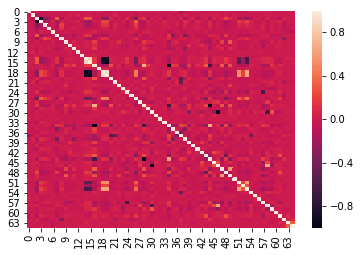

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(attributes_corr)
plt.show()

In [8]:
sum3 = 0
for i in range(65):
    for j in range(65):
        if j >= i:
            break
        if attributes_corr[i][j] >= 0.3:
            sum3 += 1
print(sum3, 65*64/2)

19 2080.0


In [9]:
sum8 = 0
for i in range(65):
    for j in range(65):
        if j >= i:
            break
        if attributes_corr[i][j] >= 0.8:
            sum8 += 1
print(sum8, 65*64/2)

2 2080.0


In [10]:
sum1 = 0
for i in range(65):
    for j in range(65):
        if j >= i:
            break
        if attributes_corr[i][j] >= 0.1:
            sum1 += 1
print(sum1, 65*64/2)

119 2080.0
